In [1]:
# Scientific Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             classification_report, 
                             precision_score, 
                             recall_score, 
                             f1_score)

In [2]:
dataset = pd.read_csv("OSTEOPOROSIS.csv")
dataset.drop(columns = ['Id'], inplace = True)

dataset.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [31]:
dataset

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [32]:
# Mendapatkan nama kolom yang tidak bersifat numerik
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Menampilkan nilai unik dari setiap kolom kategorikal
for col in categorical_cols:
    unique_values = dataset[col].unique()
    print(f"Kolom '{col}': {unique_values}")

Kolom 'Gender': ['Female' 'Male']
Kolom 'Hormonal Changes': ['Normal' 'Postmenopausal']
Kolom 'Family History': ['Yes' 'No']
Kolom 'Race/Ethnicity': ['Asian' 'Caucasian' 'African American']
Kolom 'Body Weight': ['Underweight' 'Normal']
Kolom 'Calcium Intake': ['Low' 'Adequate']
Kolom 'Vitamin D Intake': ['Sufficient' 'Insufficient']
Kolom 'Physical Activity': ['Sedentary' 'Active']
Kolom 'Smoking': ['Yes' 'No']
Kolom 'Alcohol Consumption': ['Moderate' nan]
Kolom 'Medical Conditions': ['Rheumatoid Arthritis' nan 'Hyperthyroidism']
Kolom 'Medications': ['Corticosteroids' nan]
Kolom 'Prior Fractures': ['Yes' 'No']


In [3]:
dataset.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [4]:
value_counts = dataset['Osteoporosis'].value_counts()

print("Jumlah nilai 0:", value_counts[0])
print("Jumlah nilai 1:", value_counts[1])

Jumlah nilai 0: 979
Jumlah nilai 1: 979


PREPROCESSING

In [3]:
# Menghitung nilai yang hilang untuk setiap kolom
missing_values = dataset.isnull().sum()

# Menampilkan nilai yang hilang
print(missing_values)

Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64


In [6]:
dataset.fillna("NA", inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  1958 non-null   object
 11  Medical Conditions   1958 non-null   object
 12  Medications          1958 non-null   object
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 229.6+ KB


In [7]:
# Menggunakan label encoding untuk kolom biner
label_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Smoking', 'Prior Fractures', 'Osteoporosis']
label_encoder = LabelEncoder()
for col in label_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Menggunakan one hot encoding untuk kolom non-biner
one_hot_cols = ['Race/Ethnicity', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Medical Conditions', 'Medications']
dataset = pd.get_dummies(dataset, columns=one_hot_cols)


In [114]:
dataset.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,2,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,1,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,1,1,1,1


In [113]:
encoder = LabelEncoder()
for col in dataset.columns[1:-1]:
    dataset[col] = encoder.fit_transform(dataset[col].values)

dataset.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,2,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,1,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,1,1,1,1


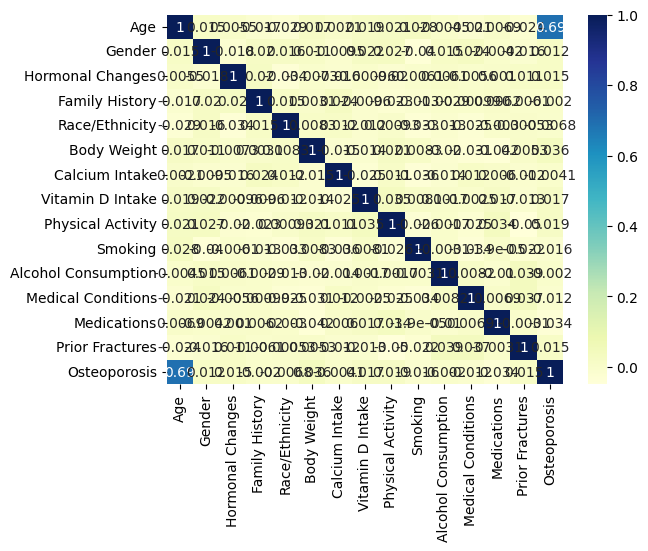

In [408]:

# import modules 
import matplotlib.pyplot as mp 
import pandas as pd 
import seaborn as sb 
  

# plotting correlation heatmap 
dataplot = sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
mp.show() 


TANPA HYPARAMETER

In [307]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = ['Osteoporosis']), 
                                                    dataset['Osteoporosis'], 
                                                    test_size = 0.3, 
                                                    random_state = 30)

In [125]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [393]:


param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1, 10, 100],
    'reg_lambda': [0, 0.1, 1, 10, 100]
}

# Initialize XGBoost classifier
model = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring = 'accuracy', 
                           cv = 5, 
                           n_jobs = -1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)



Best Parameters: {'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 10}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [403]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import pandas as pd

# Menyimpan hasil metrik
results = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i in range(1):
    fold_results = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
    
    # Membagi dataset menjadi K folds
    for train_index, test_index in kf.split(dataset):
        X_train, X_test = dataset.drop(columns=['Osteoporosis']).iloc[train_index], dataset.drop(columns=['Osteoporosis']).iloc[test_index]
        y_train, y_test = dataset['Osteoporosis'].iloc[train_index], dataset['Osteoporosis'].iloc[test_index]
        
        # Melatih model XGBoost
        model = XGBClassifier()
        model.fit(X_train, y_train)

        # Melakukan prediksi pada test set
        y_pred = model.predict(X_test)

        # Menghitung metrik evaluasi
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Menyimpan metrik evaluasi untuk fold saat ini
        fold_results['accuracy'].append(accuracy)
        fold_results['precision'].append(precision)
        fold_results['recall'].append(recall)
        fold_results['f1_score'].append(f1)
    
    # Menghitung rata-rata metrik untuk seluruh fold pada iterasi ini
    resultss['accuracy'].append(sum(fold_results['accuracy']) / len(fold_results['accuracy']))
    resultss['precision'].append(sum(fold_results['precision']) / len(fold_results['precision']))
    resultss['recall'].append(sum(fold_results['recall']) / len(fold_results['recall']))
    resultss['f1_score'].append(sum(fold_results['f1_score']) / len(fold_results['f1_score']))

    # Print metrik untuk setiap iterasi (opsional)
    print(f"Iteration {i+1}:")
    print(f"Accuracy: {resultss['accuracy'][-1]}")
    print(f"Precision: {resultss['precision'][-1]}")
    print(f"Recall: {resultss['recall'][-1]}")
    print(f"F1 Score: {resultss['f1_score'][-1]}\n")

# Mengubah hasil metrik menjadi DataFrame untuk analisis lebih lanjut
results_dff = pd.DataFrame(resultss)
print("\nAverage Metrics Over 30 Iterations:")
print(results_df.mean())

# Menyimpan hasil ke dalam file CSV
results_dff.to_excel('tanpahyper22.xlsx')

Iteration 1:
Accuracy: 0.88713267915862
Precision: 0.9326051173249971
Recall: 0.8338430133325412
F1 Score: 0.8802218693241555


Average Metrics Over 30 Iterations:
accuracy     0.912670
precision    0.997418
recall       0.827034
f1_score     0.904162
dtype: float64


In [388]:
def calculate_classification_metrics(y_train, y_train_hat, y_test, y_test_hat):


    accuracy_train = accuracy_score(y_train, y_train_hat)
    accuracy_test = accuracy_score(y_test, y_test_hat)
    precision_train = precision_score(y_train, y_train_hat)
    precision_test = precision_score(y_test, y_test_hat)
    recall_train = recall_score(y_train, y_train_hat)
    recall_test = recall_score(y_test, y_test_hat)
    f1_train = f1_score(y_train, y_train_hat)
    f1_test = f1_score(y_test, y_test_hat)

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Train': [accuracy_train, precision_train, recall_train, f1_train],
        'Test': [accuracy_test, precision_test, recall_test, f1_test]
    })
    
    return metrics_df

In [395]:
y_train_grid = model.predict(X_train)
y_test_grid = model.predict(X_test)

best_model_metrics = calculate_classification_metrics(y_train, y_train_grid, y_test, y_test_grid)
best_model_metrics

,Metric,Train,Test
0,Accuracy,0.999362,0.874680
1,Precision,1.000000,0.922581
2,Recall,0.998748,0.794444
3,F1 Score,0.999374,0.853731


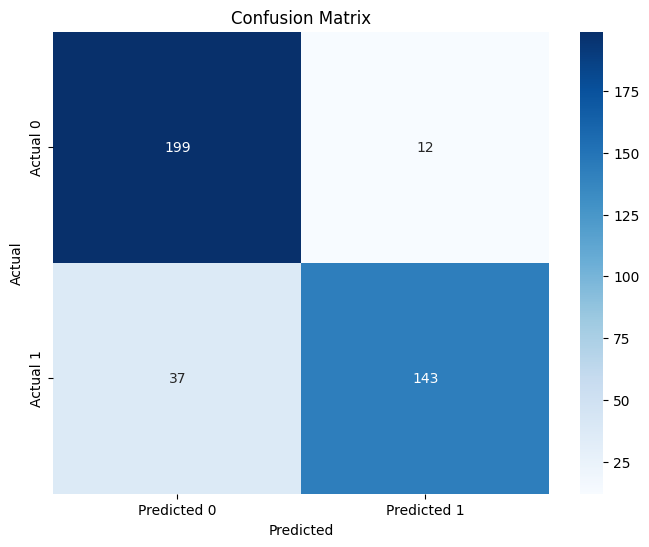

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_test_grid)
# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


HYPARAMETER

In [231]:

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1, 10, 100],
    'reg_lambda': [0, 0.1, 1, 10, 100]
}

# Initialize XGBoost classifier
model = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid, 
                           scoring = 'accuracy', 
                           cv = 5, 
                           n_jobs = -1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)



Best Parameters: {'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 10}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

CROSS VALIDATION

In [401]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import pandas as pd

# Menyimpan hasil metrik
results = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

# Melakukan training berulang selama 5 kali menggunakan K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i in range(1):
    fold_results = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
    
    # Membagi dataset menjadi K folds
    for train_index, test_index in kf.split(dataset):
        X_train, X_test = dataset.drop(columns=['Osteoporosis']).iloc[train_index], dataset.drop(columns=['Osteoporosis']).iloc[test_index]
        y_train, y_test = dataset['Osteoporosis'].iloc[train_index], dataset['Osteoporosis'].iloc[test_index]
        
        # Melatih model XGBoost
        model2 = XGBClassifier(max_depth=3, min_child_weight=1, reg_alpha=1, reg_lambda=10)
        model2.fit(X_train, y_train)

        # Melakukan prediksi pada test set
        y_pred = model2.predict(X_test)

        # Menghitung metrik evaluasi
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Menyimpan metrik evaluasi untuk fold saat ini
        fold_results['accuracy'].append(accuracy)
        fold_results['precision'].append(precision)
        fold_results['recall'].append(recall)
        fold_results['f1_score'].append(f1)
    
    # Menghitung rata-rata metrik untuk seluruh fold pada iterasi ini
    results['accuracy'].append(sum(fold_results['accuracy']) / len(fold_results['accuracy']))
    results['precision'].append(sum(fold_results['precision']) / len(fold_results['precision']))
    results['recall'].append(sum(fold_results['recall']) / len(fold_results['recall']))
    results['f1_score'].append(sum(fold_results['f1_score']) / len(fold_results['f1_score']))

    # Print metrik untuk setiap iterasi (opsional)
    print(f"Iteration {i+1}:")
    print(f"Accuracy: {results['accuracy'][-1]}")
    print(f"Precision: {results['precision'][-1]}")
    print(f"Recall: {results['recall'][-1]}")
    print(f"F1 Score: {results['f1_score'][-1]}\n")

# Mengubah hasil metrik menjadi DataFrame untuk analisis lebih lanjut
results_df = pd.DataFrame(results)
print("\nAverage Metrics Over 30 Iterations:")
print(results_df.mean())


Iteration 1:
Accuracy: 0.9126702855055064
Precision: 0.9974180157741802
Recall: 0.8270339748182266
F1 Score: 0.9041620263801293


Average Metrics Over 30 Iterations:
accuracy     0.912670
precision    0.997418
recall       0.827034
f1_score     0.904162
dtype: float64


In [405]:
y_train_hat = model2.predict(X_train)
y_test_hat = model2.predict(X_test)

model_metrics = calculate_classification_metrics(y_train, y_train_hat, y_test, y_test_hat)
model_metrics

,Metric,Train,Test
0,Accuracy,0.916401,0.907928
1,Precision,1.000000,0.993151
2,Recall,0.836045,0.805556
3,F1 Score,0.910702,0.889571


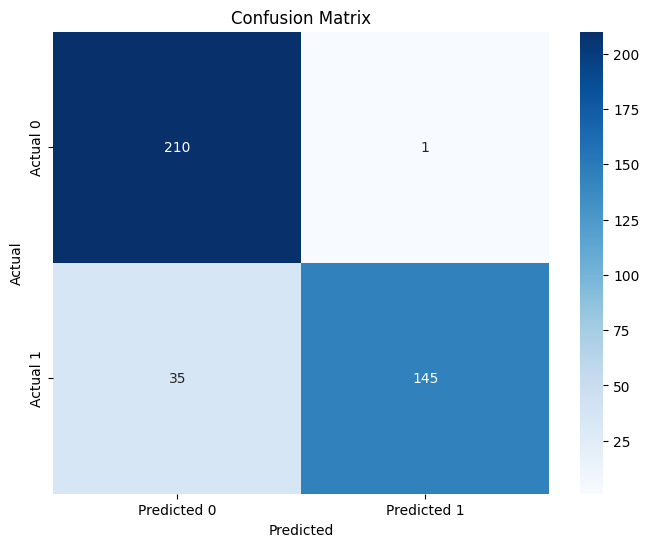

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_test_hat)
# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
